#  This program attempts to optimize a users portfolio usign the efficient frotier

In [1]:
# import the python libraries

In [3]:
from pandas_datareader import data as web
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [4]:
#Get the stock symbols/ tickers in the portfolio
#FAANG 
assets=['FB','AMZN','AAPL','NFLX','GOOG']

In [5]:
#Assing weights to the stocks.
weights = np.array([0.2,0.2,0.2,0.2,0.2])

In [6]:
#Get the stock/portfolio starting date
stockStartDate='2013-01-01'

In [7]:
# Get the stocks ending date (today)
today=datetime.today().strftime('%Y-%m-%d')
today

'2020-12-21'

In [10]:
# Create a dataframe to store the adjusted close price of the stocks
df= pd.DataFrame()

#Store the adjusted close price of the stock into the df
for stock in assets:
  df[stock]=web.DataReader(stock, data_source='yahoo', start=stockStartDate, end = today)['Adj Close']

In [11]:
# Show the df
df

,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,28.000000,257.309998,17.065252,13.144286,360.274597
2013-01-03,27.770000,258.480011,16.849854,13.798572,360.483826
2013-01-04,28.760000,259.149994,16.380503,13.711429,367.607117
2013-01-07,29.420000,268.459991,16.284145,14.171429,366.003143
2013-01-08,29.059999,266.380005,16.327978,13.880000,365.280823
...,...,...,...,...,...
2020-12-15,275.549988,3165.120117,127.879997,519.780029,1767.770020
2020-12-16,275.670013,3240.959961,127.809998,524.830017,1763.000000
2020-12-17,274.480011,3236.080078,128.699997,532.900024,1747.900024


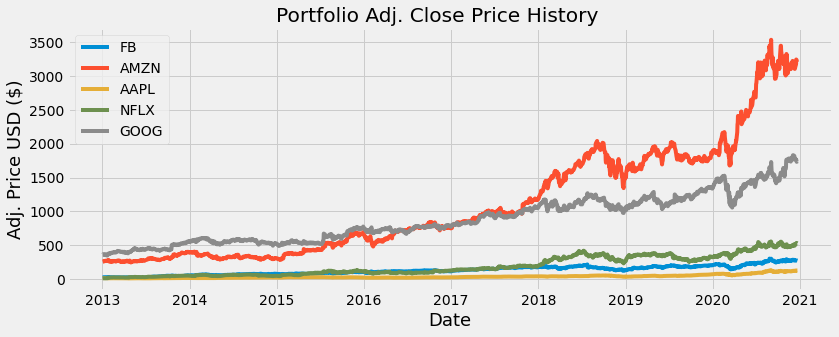

In [15]:
# Create the title 'Portfolio Adj Close Price History
title = 'Portfolio Adj. Close Price History    '

#Get the stocks
my_stocks = df

#Create and plot the graph
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5

# Loop through each stock and plot the Adj Close for each day
for c in my_stocks.columns.values:
  plt.plot( my_stocks[c],  label=c)#plt.plot( X-Axis , Y-Axis, line_width, alpha_for_blending,  label)
plt.title(title)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Adj. Price USD ($)',fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

In [16]:
# Show the daily simple return 
returns = df.pct_change()
returns


,FB,AMZN,AAPL,NFLX,GOOG
Date,,,,,
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.008214,0.004547,-0.012622,0.049777,0.000581
2013-01-04,0.035650,0.002592,-0.027855,-0.006315,0.019760
2013-01-07,0.022949,0.035925,-0.005882,0.033549,-0.004363
2013-01-08,-0.012237,-0.007748,0.002692,-0.020565,-0.001974
...,...,...,...,...,...
2020-12-15,0.004960,0.002582,0.050090,-0.005053,0.004381
2020-12-16,0.000436,0.023961,-0.000547,0.009716,-0.002698
2020-12-17,-0.004317,-0.001506,0.006963,0.015376,-0.008565


In [17]:
# Create and show the annualized coveriance matrix
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual

,FB,AMZN,AAPL,NFLX,GOOG
FB,0.118906,0.055121,0.044844,0.056771,0.050435
AMZN,0.055121,0.094270,0.039824,0.063478,0.047843
AAPL,0.044844,0.039824,0.081734,0.035137,0.038614
NFLX,0.056771,0.063478,0.035137,0.211281,0.048690
GOOG,0.050435,0.047843,0.038614,0.048690,0.066080


In [18]:
# Calculate the portfolio variance
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

0.06135129581095938

In [19]:
# Calculate the portfolio volatility aka standard deviation
port_volatility = np.sqrt(port_variance)
port_volatility

0.2476919373152049

In [21]:
# Calculate the annual portfolio return 
portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualReturn

0.3599451462798981

In [22]:
# Show the expected annual return, volatility (risk), and variance

percent_var = str(round(port_variance,2)*100)+'%'
percent_vols = str(round(port_volatility,2)*100)+'%'
percent_ret = str(round(portfolioSimpleAnnualReturn,2)*100)+'%'

print('Expected annual return: ' + percent_ret)
print('Annual volatility/risk: '+ percent_vols)
print('Annual variance: '+percent_var)

Expected annual return: 36.0%
Annual volatility/risk: 25.0%
Annual variance: 6.0%


In [23]:
pip install PyPortfolioOpt

     |████████████████████████████████| 51kB 2.9MB/s 


In [24]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [29]:
# Portfolio Optimization !

# Calculate the expected returns and the annualised sample covariance matrix of asset returns
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimize for max sharp ratio
ef = EfficientFrontier(mu,S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose = True)


OrderedDict([('FB', 0.07921), ('AMZN', 0.30355), ('AAPL', 0.27174), ('NFLX', 0.3455), ('GOOG', 0.0)])
Expected annual return: 42.2%
Annual volatility: 27.4%
Sharpe Ratio: 1.47


(0.4215806524821307, 0.27360318903579833, 1.4677484348677958)

In [30]:
0.07921 + 0.30355 + 0.27174 + 0.3455 + 0.0

1.0

In [31]:
# Get the discrete alocation of each share per stock
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

latest_prices=get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value=15000)

allocation, leftover = da.lp_portfolio()
print('Discrete allocation: ', allocation)
print('Funds remaining: ${:.2f}'.format(leftover))

Discrete allocation:  {'FB': 5, 'AMZN': 1, 'AAPL': 32, 'NFLX': 10}
Funds remaining: $1037.41
